# Preambule

In [4]:
library(stringr)
library(tidyverse)
library(wesanderson)
library(nlme)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘nlme’

The following object is masked from ‘package:dplyr’:

    collapse



In [5]:
# Multiple plot function from : http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2)/
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

In [1]:
xticks <- seq(0, 12*24, by = 24)

# SCFA data

In [15]:
b1_scfa <- read.table('../data/S1_scfa.txt', sep = '\t', quote = '')
b2_scfa <- read.table('../data/S2_scfa.txt', sep = '\t', quote = '')

In [ ]:
atm1 <- read.table('../data/S3_scfa.txt', sep = '\t', quote = '')
atm2 <- read.table('../data/S4_scfa.txt', sep = '\t', quote = '')

# SCFA plot

In [12]:
theme_scfa <- theme_light() + 
            theme(legend.position = 'right'
                 , panel.grid = element_blank()
                  
                 , strip.text.x = element_text(size = 10, colour = "black", face = "bold", vjust = 0)
                 , strip.background = element_rect(color="white", fill="white", size=0, linetype="solid") 
                 , axis.text = element_text(size = 8.5, colour = "black")
                 , axis.title = element_text(size = 8.5, colour = "black")
                 , axis.title.y = element_text(margin = margin(t = 0, b = 0, r = -0.1, l = 0))
                 , legend.title = element_text(size = 9)
                 , legend.text.align = 0
                 , legend.margin = margin(t = 0, r = 4, b = 0, l = -6)) 

In [14]:
b1_ace <- ggplot(b1_scfa %>% subset(Name == 'Acetate' & str_detect(Sample, pattern = 'C'))
       , aes(x = Time, y = Conc_cor, group = SampleBatch, fill = Sample)) + 
            stat_summary(fun.y = "mean", size = 0.2, geom = "line", color = 'azure4', linetype = 'dashed') +
            stat_summary(fun.y = "mean", geom = "point", color = 'black', size = 2.5, alpha = 0.85, shape=21) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max"
                         , size = 0.5, geom = "linerange", linetype = 'solid', color = 'indianred') +
            scale_fill_manual(values = c('azure2', 'deepskyblue4'), guide=FALSE) + 
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0, 6*24)) +
            ylab(expression('Acetate (mmol.L'^-1*')')) + xlab('Time (days)') + 
            theme_scfa

b1_but <- ggplot(b1_scfa %>% subset(Name == 'Butyrate' & str_detect(Sample, pattern = 'C'))
       , aes(x = Time, y = Conc_cor, group = SampleBatch, fill = Sample)) + 
            stat_summary(fun.y = "mean", size = 0.2, geom = "line", color = 'azure4', linetype = 'dashed') +
            stat_summary(fun.y = "mean", geom = "point", color = 'black', size = 2.5, alpha = 0.85, shape=21) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max"
                         , size = 0.5, geom = "linerange", linetype = 'solid', color = 'indianred') +
            scale_fill_manual(values = c('azure2', 'deepskyblue4'), guide=FALSE) + 
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0, 6*24)) +
            ylab(expression('Butyrate (mmol.L'^-1*')')) + xlab('Time (days)') + 
            theme_scfa

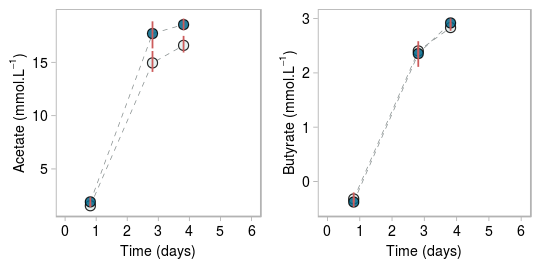

In [39]:
options(repr.plot.width=2.25*2, repr.plot.height=2.25)
multiplot(plotlist = list(b1_ace, b1_but), cols = 2)

In [16]:
b2_ace <- ggplot(b2_scfa %>% subset(Name == 'Acetate' & str_detect(Sample, pattern = 'C') )
       , aes(x = Time, y = Conc_cor, group = SampleBatch, fill = Sample)) + 
            stat_summary(fun.y = "mean", size = 0.2, geom = "line", color = 'azure4', linetype = 'dashed') +
            stat_summary(fun.y = "mean", geom = "point", color = 'black', size = 2.5, alpha = 0.85, shape=21) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max"
                         , size = 0.5, geom = "linerange", linetype = 'solid', color = 'indianred') +
            scale_fill_manual(values = c('azure2', 'deepskyblue4'), guide=FALSE) + 
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0, NA)) +
            ylab(expression('Acetate (mmol.L'^-1*')')) + xlab('Time (days)') + 
            theme_scfa
b2_but <- ggplot(b2_scfa %>% subset(Name == 'Butyrate' & str_detect(Sample, pattern = 'C') )
       , aes(x = Time, y = Conc_cor, group = SampleBatch, fill = Sample)) + 
            stat_summary(fun.y = "mean", size = 0.2, geom = "line", color = 'azure4', linetype = 'dashed') +
            stat_summary(fun.y = "mean", geom = "point", color = 'black', size = 2.5, alpha = 0.85, shape=21) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max"
                         , size = 0.5, geom = "linerange", linetype = 'solid', color = 'indianred') +
            scale_fill_manual(values = c('azure2', 'deepskyblue4'), guide=FALSE) + 
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0, NA)) +
            ylab(expression('Butyrate (mmol.L'^-1*')')) + xlab('Time (days)') + 
            theme_scfa

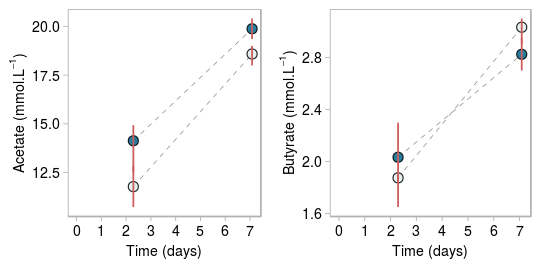

In [40]:
options(repr.plot.width=2.25*2, repr.plot.height=2.25)
multiplot(plotlist = list(b2_ace, b2_but), cols = 2)

In [24]:
atm1_ace <- ggplot(atm1 %>% subset(Name == 'Acetate' & str_detect(Sample, pattern = 'C') )
       , aes(x = Time, y = Concentration, group = SampleBatch, fill = Sample)) + 
            stat_summary(fun.y = "mean", size = 0.2, geom = "line", color = 'azure4', linetype = 'dashed') +
            stat_summary(fun.y = "mean", geom = "point", color = 'black', size = 2.5, alpha = 0.85, shape=21) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max"
                         , size = 0.5, geom = "linerange", linetype = 'solid', color = 'indianred') +
            scale_fill_manual(values = c('azure2', 'deepskyblue4'), guide=FALSE) + 
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0, NA)) +
            
            ylab(expression('Acetate (mmol.L'^-1*')')) + xlab('Time (days)') + 
            theme_scfa

atm1_but <- ggplot(atm1 %>% subset(Name == 'Butyrate' & str_detect(Sample, pattern = 'C'))
       , aes(x = Time, y = Concentration, group = SampleBatch, fill = Sample)) + 
            stat_summary(fun.y = "mean", size = 0.2, geom = "line", color = 'azure4', linetype = 'dashed') +
            stat_summary(fun.y = "mean", geom = "point", color = 'black', size = 2.5, alpha = 0.85, shape=21) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max"
                         , size = 0.5, geom = "linerange", linetype = 'solid', color = 'indianred') +
            scale_fill_manual(values = c('azure2', 'deepskyblue4'), guide=FALSE) + 
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0, NA)) +
            ylab(expression('Butyrate (mmol.L'^-1*')')) + xlab('Time (days)') + 
            theme_scfa

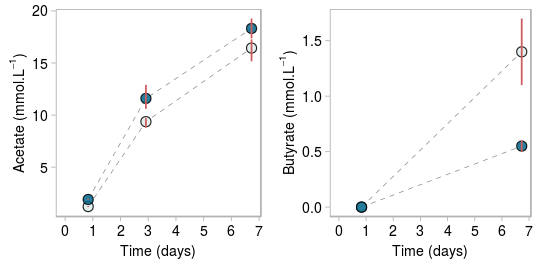

In [41]:
options(repr.plot.width=2.25*2, repr.plot.height=2.25)
multiplot(plotlist = list(atm1_ace, atm1_but), cols = 2)

In [43]:
atm2_ace <- ggplot(atm2 %>% subset(Name == 'Acetate' & str_detect(Sample, pattern = 'C') )
       , aes(x = Time, y = Conc_corrected, group = Sample, fill = Sample)) + 
            stat_summary(fun.y = "mean", size = 0.2, geom = "line", color = 'azure4', linetype = 'dashed') +
            stat_summary(fun.y = "mean", geom = "point", color = 'black', size = 2.5, alpha = 0.85, shape=21) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max"
                         , size = 0.5, geom = "linerange", linetype = 'solid', color = 'indianred') +
            scale_fill_manual(values = c('azure2', 'deepskyblue4'), guide=FALSE) + 
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0, NA)) +
            ylab(expression('Acetate (mmol.L'^-1*')')) + xlab('Time (days)') + 
            theme_scfa

atm2_but <- ggplot(atm2 %>% subset(Name == 'Butyrate' & str_detect(Sample, pattern = 'C') )
       , aes(x = Time, y = Conc_corrected, group = Sample, fill = Sample)) + 
            stat_summary(fun.y = "mean", size = 0.2, geom = "line", color = 'azure4', linetype = 'dashed') +
            stat_summary(fun.y = "mean", geom = "point", color = 'black', size = 2.5, alpha = 0.85, shape=21) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max"
                         , size = 0.5, geom = "linerange", linetype = 'solid', color = 'indianred') +
            scale_fill_manual(values = c('azure2', 'deepskyblue4'), guide=FALSE) + 
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0, NA)) +
            ylab(expression('Butyrate (mmol.L'^-1*')')) + xlab('Time (days)') + 
            theme_scfa

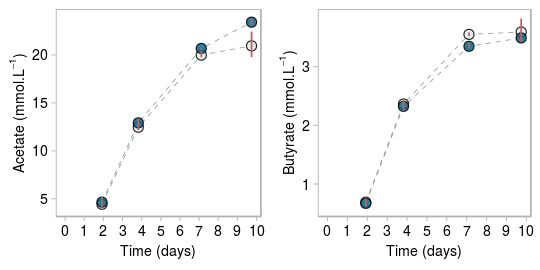

In [44]:
options(repr.plot.width=2.25*2, repr.plot.height=2.25)
multiplot(plotlist = list(atm2_ace, atm2_but), cols = 2)

# Gases data

In [53]:
b1_gas <- read.table('/ebio/abt3_projects/small_projects/aruaud/Christensenella_paper/data/S1_gases.txt', quote = '', sep = '\t', header = TRUE, stringsAsFactors = FALSE )
b2_gas <- read.table('/ebio/abt3_projects/small_projects/aruaud/Christensenella_paper/data/S2_gases.txt', quote = '', sep = '\t', header = TRUE, stringsAsFactors = FALSE )
atm1_gas <- read.table('/ebio/abt3_projects/small_projects/aruaud/Christensenella_paper/data/S3_gases.txt', quote = '', sep = '\t', header = TRUE, stringsAsFactors = FALSE )
atm2_gas <- read.table('/ebio/abt3_projects/small_projects/aruaud/Christensenella_paper/data/S4_gases.txt', quote = '', sep = '\t', header = TRUE, stringsAsFactors = FALSE )

# Gases plot

In [46]:
b1_c <- ggplot(data = b1_gas %>% subset(microbe == 'C. minuta' & gas != 'CH4') 
                       , aes(x = Time, y = Concentration, group = id)) + 
            
            stat_summary(fun.y = "mean", size = 0.15, geom = "line", color = 'azure4') +
            stat_summary(shape=25, fill = '#D55E00',fun.y = "mean", size = 2, geom = "point", color = 'black', alpha = 0.75) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max", size = 0.45, geom = "linerange", color = 'indianred') +
            ylim(c(0, 22)) + 
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0,NA)) +
            ylab(expression('Concentration (mmol.L'^-1*')')) + xlab('Time (days)') + theme_scfa

b1_m <- ggplot(data = b1_gas %>% subset(microbe == 'M. smithii' & gas != 'H2')
                       , aes(x = Time, y = Concentration, group = id)) + 
            
            stat_summary(fun.y = "mean", size = 0.15, geom = "line", color = 'azure4') +
            stat_summary(shape=24, fill = '#56B4E9',fun.y = "mean", size = 2, geom = "point", color = 'black', alpha = 0.75) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max", size = 0.45, geom = "linerange", color = 'indianred') +
            ylim(c(0,15)) + 
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0,NA)) +
            ylab(expression('Concentration (mmol.L'^-1*')')) + xlab('Time (days)') + theme_scfa

b1_mc <- ggplot(data = b1_gas %>% subset(Sample == 'MC')
                       , aes(x = Time, y = Concentration, group = id)) + 
            
            stat_summary(fun.y = "mean", size = 0.15, geom = "line", color = 'azure4') +
            stat_summary(aes(fill = gas), shape=25, fun.y = "mean", size = 2, geom = "point", color = 'black', alpha = 0.75) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max", size = 0.45, geom = "linerange", color = 'indianred') +
            scale_fill_manual(values = c("#56B4E9", "#D55E00")) +
            ylim(c(0,15)) + 
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0,NA)) +
            ylab(expression('Concentration (mmol.L'^-1*')')) + xlab('Time (days)') + 
            theme_scfa + theme(legend.position = 'None')

ERROR: Error in eval(e, x, parent.frame()): object 'gas' not found


In [47]:
options(repr.plot.width=2.25*3, repr.plot.height=2.25)
multiplot(plotlist = list(b1_c, b1_m, b1_mc), cols = 3)

ERROR: Error in multiplot(plotlist = list(b1_c, b1_m, b1_mc), cols = 3): object 'b1_c' not found


In [21]:
b2_c <- ggplot(data = b2_gas %>% subset(microbe == 'C. minuta' & gas != 'CH4') 
                       , aes(x = Time, y = Concentration, group = id)) + 
            
            stat_summary(fun.y = "mean", size = 0.15, geom = "line", color = 'azure4') +
            stat_summary(shape=25, fill = '#D55E00',fun.y = "mean", size = 2, geom = "point", color = 'black', alpha = 0.75) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max", size = 0.45, geom = "linerange", color = 'indianred') +
            ylim(c(0, 22)) + 
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0,NA)) +
            ylab(expression('Concentration (mmol.L'^-1*')')) + xlab('Time (days)') + theme_scfa

b2_m <- ggplot(data = b2_gas %>% subset(microbe == 'M. smithii' & gas != 'H2')
                       , aes(x = Time, y = Concentration, group = id)) + 
            
            stat_summary(fun.y = "mean", size = 0.15, geom = "line", color = 'azure4') +
            stat_summary(shape=24, fill = '#56B4E9',fun.y = "mean", size = 2, geom = "point", color = 'black', alpha = 0.75) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max", size = 0.45, geom = "linerange", color = 'indianred') +
            ylim(c(0,15)) + 
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0,NA)) +
            ylab(expression('Concentration (mmol.L'^-1*')')) + xlab('Time (days)') + theme_scfa

b2_mc <- ggplot(data = b2_gas %>% subset(Sample == 'MC')
                       , aes(x = Time, y = Concentration, group = id)) + 
            
            stat_summary(fun.y = "mean", size = 0.15, geom = "line", color = 'azure4') +
            stat_summary(aes(fill = gas), shape=25, fun.y = "mean", size = 2, geom = "point", color = 'black', alpha = 0.75) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max", size = 0.45, geom = "linerange", color = 'indianred') +
            scale_fill_manual(values = c("#56B4E9", "#D55E00")) +
            ylim(c(0,15)) + 
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0,NA)) +
            ylab(expression('Concentration (mmol.L'^-1*')')) + xlab('Time (days)') + 
            theme_scfa + theme(legend.position = 'None')

In [14]:
atm1_c <- ggplot(data = atm1_gas %>% subset(microbe == 'C. minuta' & gas != 'CH4') 
                       , aes(x = Time, y = Concentration, group = id)) + 
            
            stat_summary(fun.y = "mean", size = 0.15, geom = "line", color = 'azure4') +
            stat_summary(shape=21, fill = '#D55E00',fun.y = "mean", size = 2, geom = "point", color = 'black', alpha = 0.75) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max", size = 0.45, geom = "linerange", color = 'indianred') +
            ylim(c(0, 22)) + 
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0,NA)) +
            ylab(expression('Concentration (mmol.L'^-1*')')) + xlab('Time (days)') + theme_scfa

atm1_m <- ggplot(data = atm1_gas %>% subset(microbe == 'M. smithii' & gas != 'H2')
                       , aes(x = Time, y = Concentration, group = id)) + 
            
            stat_summary(fun.y = "mean", size = 0.15, geom = "line", color = 'azure4') +
            stat_summary(shape=22, fill = '#56B4E9',fun.y = "mean", size = 2, geom = "point", color = 'black', alpha = 0.75) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max", size = 0.45, geom = "linerange", color = 'indianred') +
            ylim(c(0,15)) + 
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0,NA)) +
            ylab(expression('Concentration (mmol.L'^-1*')')) + xlab('Time (days)') + theme_scfa

atm1_mc <- ggplot(data = atm1_gas %>% subset(Sample == 'MC')
                       , aes(x = Time, y = Concentration, group = id)) + 
            
            stat_summary(fun.y = "mean", size = 0.15, geom = "line", color = 'azure4') +
            stat_summary(aes(fill = gas), shape=21, fun.y = "mean", size = 2, geom = "point", color = 'black', alpha = 0.75) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max", size = 0.45, geom = "linerange", color = 'indianred') +
            scale_fill_manual(values = c("#56B4E9", "#D55E00")) +
            ylim(c(0,15)) + 
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0,NA)) +
            ylab(expression('Concentration (mmol.L'^-1*')')) + xlab('Time (days)') + 
            theme_scfa + theme(legend.position = 'None')

In [15]:
atm2_c <- ggplot(data = atm2_gas %>% subset(microbe == 'C. minuta' & gas != 'CH4') 
                       , aes(x = Time, y = Concentration, group = id)) + 
            
            stat_summary(fun.y = "mean", size = 0.15, geom = "line", color = 'azure4') +
            stat_summary(shape=21, fill = '#D55E00',fun.y = "mean", size = 2, geom = "point", color = 'black', alpha = 0.75) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max", size = 0.45, geom = "linerange", color = 'indianred') +
            ylim(c(0, 22)) + 
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0,NA)) +
            ylab(expression('Concentration (mmol.L'^-1*')')) + xlab('Time (days)') + theme_scfa

atm2_m <- ggplot(data = atm2_gas %>% subset(microbe == 'M. smithii' & gas != 'H2' & pressure == 'atm') 
                       , aes(x = Time, y = Concentration, group = id)) + 
            
            stat_summary(fun.y = "mean", size = 0.15, geom = "line", color = 'azure4') +
            stat_summary(shape=22, fill = '#56B4E9',fun.y = "mean", size = 2, geom = "point", color = 'black', alpha = 0.75) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max", size = 0.45, geom = "linerange", color = 'indianred') +
            ylim(c(0,15)) + 
            #scale_shape_manual(values = c(24,22)) +
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0,NA)) +
            ylab(expression('Concentration (mmol.L'^-1*')')) + xlab('Time (days)') + 
            theme_scfa + theme(legend.position = 'None')

atm2_mc <- ggplot(data = atm2_gas %>% subset(Sample == 'MC' )
                       , aes(x = Time, y = Concentration, group = id)) + 
            
            stat_summary(fun.y = "mean", size = 0.15, geom = "line", color = 'azure4') +
            stat_summary(aes(fill = gas), shape=21, fun.y = "mean", size = 2, geom = "point", color = 'black', alpha = 0.75) +
            stat_summary(fun.y = "mean", fun.ymin = "min", fun.ymax = "max", size = 0.45, geom = "linerange", color = 'indianred') +
            scale_fill_manual(values = c("#56B4E9", "#D55E00")) +
            ylim(c(0,15)) + 
            scale_x_continuous(breaks=xticks, labels = seq(0, length(xticks)-1, 1), limits = c(0,NA)) +
            ylab(expression('Concentration (mmol.L'^-1*')')) + xlab('Time (days)') + 
            theme_scfa + theme(legend.position = 'None')